In [47]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.metrics import rand_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [34]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

<Axes: >

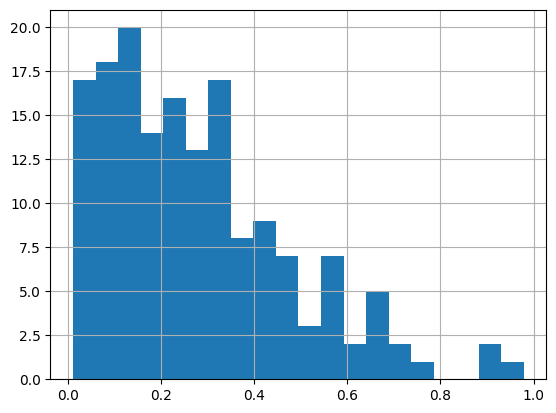

In [35]:
sympdf.mean().hist(bins=20)

In [36]:
sympdf.mean().sort_values(ascending=False).head(10)
# we're filtering out fatigue, short term memory only (ok)

Symptom_Fatigue                                         0.979440
Symptom_Memory_short                                    0.924225
Symptom_PEM                                             0.883601
Symptom_Cognitive_Functioning_attentionconcentration    0.752943
Symptom_Shortness_of_breath                             0.736860
Symptom_Insomnia                                        0.693252
Symptom_Tightness_of_chest                              0.680153
Symptom_Muscle_aches                                    0.677168
Symptom_Dizziness_vertigo                               0.672525
Symptom_Cognitive_Functioning_thinking                  0.666225
dtype: float64

In [37]:
# while these are rare, combos of rare sypmtoms might group together
# and some are particularly significant. I think I could either filter at the 5% mark on either side
# or I could  
sympdf.mean().sort_values(ascending=True).head(40)


Symptom_Eye_Vision_loss_of_vision                         0.011109
Symptom_Reproductive_early_menopause                      0.013928
Symptom_Reproductive_postmenopausal_bleeding              0.016084
Symptom_Hallucinations_other                              0.023379
Symptom_SkinAllergy_shingles                              0.025701
Symptom_Heightened_taste                                  0.030841
Symptom_Sensations_facial_paralysis                       0.032001
Symptom_Hallucinations_tactile                            0.033659
Symptom_Reproductive_testicle_penis_pain_changes          0.036478
Symptom_Eye_Vision_tunnel_vision                          0.038302
Symptom_New_anaphylaxis                                   0.042945
Symptom_Speech_other                                      0.043111
Symptom_Coughing_up_blood                                 0.047919
Symptom_Ear_numbness                                      0.049411
Symptom_Inability_to_yawn                                 0.05

In [38]:
# the formal rec might be 10% but I think I'm going to go with 5% for now
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [39]:
sympdf.shape

(6031, 147)

In [40]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=123)


In [41]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it, max_LL=-4.1e+5, max_avg_LL=-68]


StepMix(measurement='binary', n_components=9, random_state=123)

In [105]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
}

# no gaussians or whatever, so n_steps can just be 1 

gs = GridSearchCV(estimator=model, cv=3, param_grid=grid, verbose=0)
gs.fit(sympdf)



Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.37it/s, max_LL=-2.87e+5, max_avg_LL=-71.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.03it/s, max_LL=-2.86e+5, max_avg_LL=-71.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.26it/s, max_LL=-2.88e+5, max_avg_LL=-71.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.40it/s, max_LL=-2.8e+5, max_avg_LL=-69.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.03it/s, max_LL=-2.8e+5, max_avg_LL=-69.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.07it/s, max_LL=-2.83e+5, max_avg_LL=-70.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.91it/s, max_LL=-2.78e+5, max_avg_LL=-69.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.48it/s, max_LL=-2.78e+5, max_avg_LL=-69]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.60it/s, max_LL=-2.8e+5, max_avg_LL=-69.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.16s/it, max_LL=-2.75e+5, max_avg_LL=-68.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.84it/s, max_LL=-2.76e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.02s/it, max_LL=-2.78e+5, max_avg_LL=-69.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.07s/it, max_LL=-2.75e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, max_LL=-2.74e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.25it/s, max_LL=-2.77e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-2.73e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, max_LL=-2.74e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.41it/s, max_LL=-2.76e+5, max_avg_LL=-68.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.30it/s, max_LL=-2.72e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.08s/it, max_LL=-2.73e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.12it/s, max_LL=-2.76e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.52s/it, max_LL=-2.72e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.42s/it, max_LL=-2.72e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-2.75e+5, max_avg_LL=-68.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it, max_LL=-2.71e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.42s/it, max_LL=-2.71e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it, max_LL=-2.74e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.24s/it, max_LL=-2.71e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.81s/it, max_LL=-2.71e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.53s/it, max_LL=-2.74e+5, max_avg_LL=-68.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.81s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.88s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it, max_LL=-2.73e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.62s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.76s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.02s/it, max_LL=-2.73e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-2.69e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.39s/it, max_LL=-2.69e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.74s/it, max_LL=-2.73e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.32s/it, max_LL=-2.69e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.04s/it, max_LL=-2.69e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.26s/it, max_LL=-2.72e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it, max_LL=-2.68e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.06s/it, max_LL=-2.68e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it, max_LL=-2.72e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.95s/it, max_LL=-2.68e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it, max_LL=-2.68e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.25s/it, max_LL=-2.71e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.30s/it, max_LL=-2.68e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.16s/it, max_LL=-2.68e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it, max_LL=-2.71e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.26s/it, max_LL=-2.67e+5, max_avg_LL=-66.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.60s/it, max_LL=-2.67e+5, max_avg_LL=-66.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.91s/it, max_LL=-2.71e+5, max_avg_LL=-67.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.81s/it, max_LL=-2.67e+5, max_avg_LL=-66.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.04s/it, max_LL=-2.67e+5, max_avg_LL=-66.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.63s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.15s/it, max_LL=-2.67e+5, max_avg_LL=-66.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.83s/it, max_LL=-2.67e+5, max_avg_LL=-66.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.30s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.70s/it, max_LL=-2.66e+5, max_avg_LL=-66.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.69s/it, max_LL=-2.66e+5, max_avg_LL=-66.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.73s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.78s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.54s/it, max_LL=-2.66e+5, max_avg_LL=-66.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.90s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.46s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.56s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.01s/it, max_LL=-2.69e+5, max_avg_LL=-67]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.80s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.18s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.44s/it, max_LL=-2.69e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.96s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=StepMix(measurement='binary', n_components=30,
                               random_state=123),
             param_grid={'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25]})

In [106]:
results = pd.DataFrame(gs.cv_results_)
results["Val. Log Likelihood"] = results['mean_test_score']

In [107]:
results_old = results.copy()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_30497/1270231869.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',


<Axes: xlabel='param_n_components', ylabel='Val. Log Likelihood'>

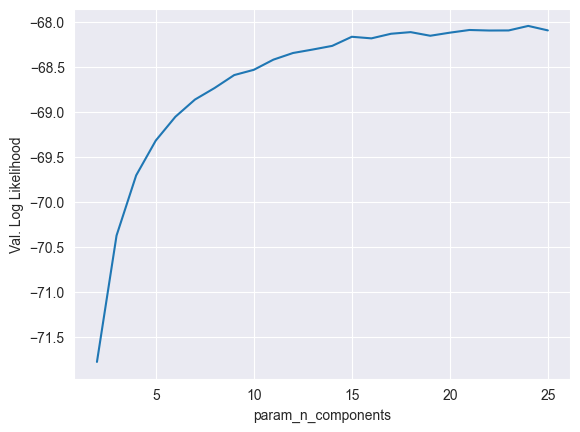

In [108]:
sns.set_style("darkgrid")
sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',
              palette='Dark2')

In [109]:
%%capture
results = dict(param_n_components=[], aic=[], bic=[])

# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    model.fit(sympdf)
    results['param_n_components'].append(g['n_components'])
    results['aic'].append(model.aic(sympdf))
    results['bic'].append(model.bic(sympdf))

# Save results to a dataframe
results = pd.DataFrame(results)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_30497/63445388.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='aic',


<Axes: xlabel='param_n_components', ylabel='aic'>

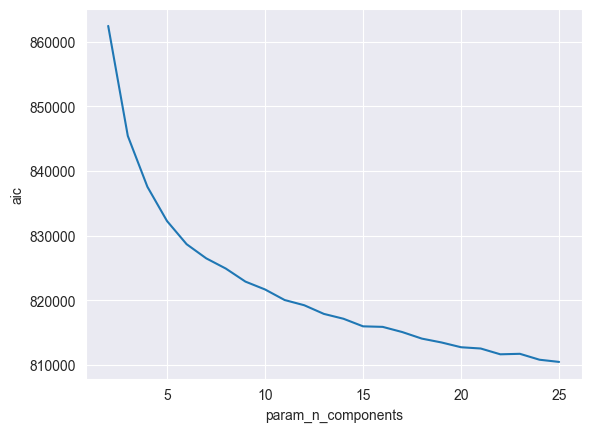

In [110]:
sns.lineplot(data=results, x='param_n_components', y='aic',
             palette='Dark2')

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_30497/2943425988.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='bic',


<Axes: xlabel='param_n_components', ylabel='bic'>

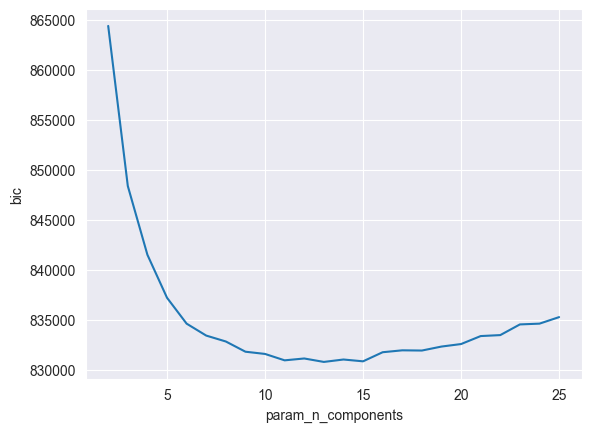

In [111]:
sns.lineplot(data=results, x='param_n_components', y='bic',
            palette='Dark2')

What we observe: more components improves our model, but the degree of improvement per additional possible cluster decreases as the number of clusters increases. Notably, the Bayes Information Criteria flattens above 9 clusters. 

Based on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7746621/?fbclid=IwAR3Gy0vBZIDrylHZpe9I0zlDiNaV1WaUrPMcAZO9seZJzkOoM6ZNeLEUd98 for a model of this size it is reasonable to use BIC, so I'm going to go ahead with 9 classes. If they end up looking highly redundant or one is especially small we can plan to scale back. 

In [54]:
model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=123)
model.fit(sympdf)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.91s/it, max_LL=-4.1e+5, max_avg_LL=-68]


StepMix(measurement='binary', n_components=9, random_state=123)

In [56]:
mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x10a0daf20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [57]:
mm

class_no,0,1,2,3,4,5,6,7,8
variable,,,,,,,,,
Symptom_Acid_reflux,0.178706,0.687073,0.422324,2.089201e-01,0.571629,0.193156,0.389478,0.058306,0.414341
Symptom_Acute_confusion,0.020265,0.662647,0.078877,4.305848e-02,0.309837,0.185075,0.171309,0.002813,0.323710
Symptom_Altered_smell,0.150065,0.517313,0.105162,1.384798e-01,0.320049,0.189525,0.260253,0.182566,0.266009
Symptom_Altered_taste,0.162425,0.601216,0.166634,1.769564e-01,0.387943,0.233438,0.314062,0.197666,0.349791
Symptom_Awakened_cannot_breathe,0.250121,0.706108,0.382756,6.976588e-02,0.552650,0.198647,0.396350,0.042426,0.418354
...,...,...,...,...,...,...,...,...,...
Symptom_Vibrating_sensations,0.203527,0.830641,0.593353,2.479463e-01,0.704495,0.221143,0.318598,0.075680,0.552340
Symptom_Vivid_dreams,0.251291,0.643132,0.243602,8.594997e-02,0.464914,0.266794,0.418986,0.022056,0.451158
Symptom_Vomiting,0.048125,0.360302,0.122568,7.670499e-02,0.273687,0.093922,0.199637,0.009611,0.197578


In [58]:
# These are just the most prevalent symptoms per cluster
# in general, this is dominated by symptoms with high cross-dataset prevalence
print(mm.sort_values(0,ascending=False).head(10).index)
print(mm.sort_values(2,ascending=False).head(10).index)
print(mm.sort_values(3,ascending=False).head(10).index)
print(mm.sort_values(4,ascending=False).head(10).index)
print(mm.sort_values(5,ascending=False).head(10).index)
print(mm.sort_values(6,ascending=False).head(10).index)
print(mm.sort_values(7,ascending=False).head(10).index)

Index(['Symptom_Insomnia', 'Symptom_Memory_short', 'Symptom_PEM',
       'Symptom_Waking_up_in_night', 'Symptom_Shortness_of_breath',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Tightness_of_chest', 'Symptom_Dry_cough',
       'Symptom_Difficulty_falling_asleep', 'Symptom_Heart_palpitations'],
      dtype='object', name='variable')
Index(['Symptom_Memory_short', 'Symptom_PEM', 'Symptom_Insomnia',
       'Symptom_Heart_palpitations', 'Symptom_Tightness_of_chest',
       'Symptom_Shortness_of_breath', 'Symptom_Tachycardia',
       'Symptom_Dizziness_vertigo', 'Symptom_Muscle_aches',
       'Symptom_Sensations_tingling_prickling'],
      dtype='object', name='variable')
Index(['Symptom_Memory_short', 'Symptom_PEM', 'Symptom_Shortness_of_breath',
       'Symptom_Tightness_of_chest',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Dry_cough', 'Symptom_Muscle_aches',
       'Symptom_Heart_palpitations', 'Symptom_Dizziness_vert

In [59]:
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

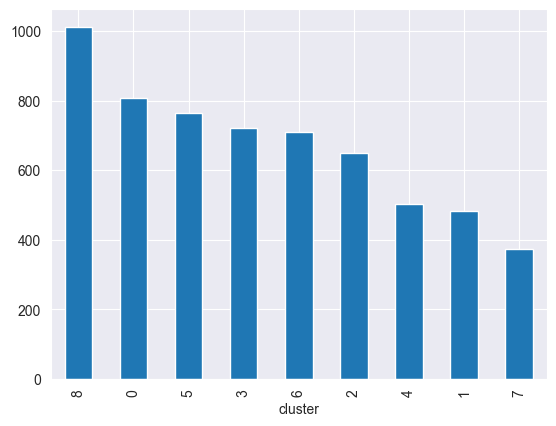

In [63]:
df['cluster'].value_counts().plot(kind='bar')
# all clusters are pretty sizeable!

In [64]:
comp_list = list(range(0,9))

In [89]:
edges = [] 
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

variable
Symptom_Insomnia                       0.369825
Symptom_Waking_up_in_night             0.189877
Symptom_Difficulty_falling_asleep      0.113352
Symptom_Waking_up_early                0.075175
Symptom_Memory_short                  -0.018539
Symptom_Sleep_apnea                   -0.027429
Symptom_Cognitive_Functioning_other   -0.030966
Symptom_Inability_to_yawn             -0.036932
Symptom_Respiratory_other             -0.038293
Symptom_SkinAllergy_other_itchy       -0.042657
dtype: float64
variable
Symptom_Speech_difficulty_reading_processing_text        0.643237
Symptom_Speech_difficulty_understanding_others_speech    0.642975
Symptom_Speech_difficulty_communicating_verbally         0.634672
Symptom_Eye_Vision_sensitivity_to_light                  0.611330
Symptom_Speech_difficulty_finding_words                  0.588105
Symptom_Speech_difficulty_speaking_complete_sentences    0.584164
Symptom_Ear_sensitivity_to_noise                         0.561123
Symptom_Eye_Vision_blurre

In [97]:
print(df.cluster.value_counts().sort_index())

cluster
0     808
1     483
2     651
3     722
4     504
5     765
6     711
7     375
8    1012
Name: count, dtype: int64


In [85]:
(sympdf[edges].mean()>.90).sum()

3

In [87]:
(sympdf[edges].mean()<.1).sum()
# some of the pretty rare symptoms are cluster-decisive
# I'm going to keep them in unless something pathological emerges downstream

18